# Load DataSet

In [1]:
import numpy as np

!wget -O Data.npz https://zenodo.org/record/4269852/files/dermamnist.npz?download=1
data = np.load('Data.npz')
print(data.files)

--2022-01-12 16:36:05--  https://zenodo.org/record/4269852/files/dermamnist.npz?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19725078 (19M) [application/octet-stream]
Saving to: ‘Data.npz’

Data.npz            100%[===================>]  18.81M  12.5MB/s    in 1.5s    

2022-01-12 16:36:09 (12.5 MB/s) - ‘Data.npz’ saved [19725078/19725078]

['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


# Visualization

In [2]:
import numpy as np

x_train = data['train_images']
y_train = data['train_labels']

x_val = data['val_images']
y_val = data['val_labels']

x_test = data['test_images']
y_test = data['test_labels']

print('Labels: ', np.unique(y_train))
labels_number = len(np.unique(y_train))

print('train_images shape: ', data['train_images'].shape)
print('train_labels shape: ', data['train_labels'].shape)

print('val_images shape: ', data['val_images'].shape)
print('val_labels shape: ', data['val_labels'].shape)

print('test_images shape: ', data['test_images'].shape)
print('test_labels shape: ', data['test_labels'].shape)

Labels:  [0 1 2 3 4 5 6]
train_images shape:  (7007, 28, 28, 3)
train_labels shape:  (7007, 1)
val_images shape:  (1003, 28, 28, 3)
val_labels shape:  (1003, 1)
test_images shape:  (2005, 28, 28, 3)
test_labels shape:  (2005, 1)


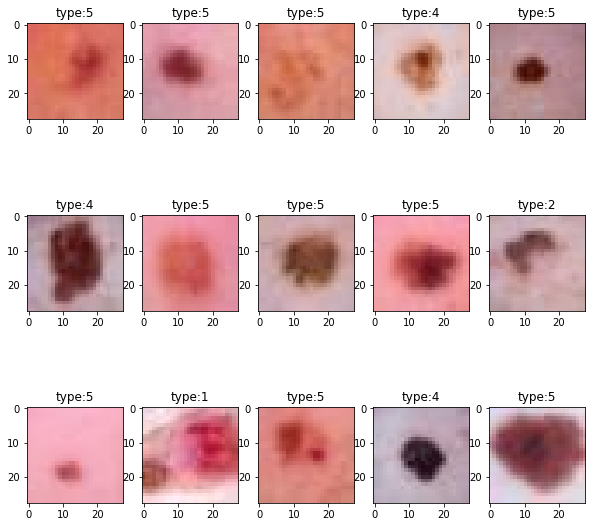

In [3]:
def plot_img(x_train, y_train):
    from matplotlib import pyplot as plt
    fig=plt.figure(figsize=(10, 10))
    columns = 5
    rows = 3
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        img = x_train[i]
        plt.imshow(img)
        plt.title('type:'+str(y_train[i][0]))
    plt.show()
plot_img(x_train, y_train)

# Unbalancment of data 

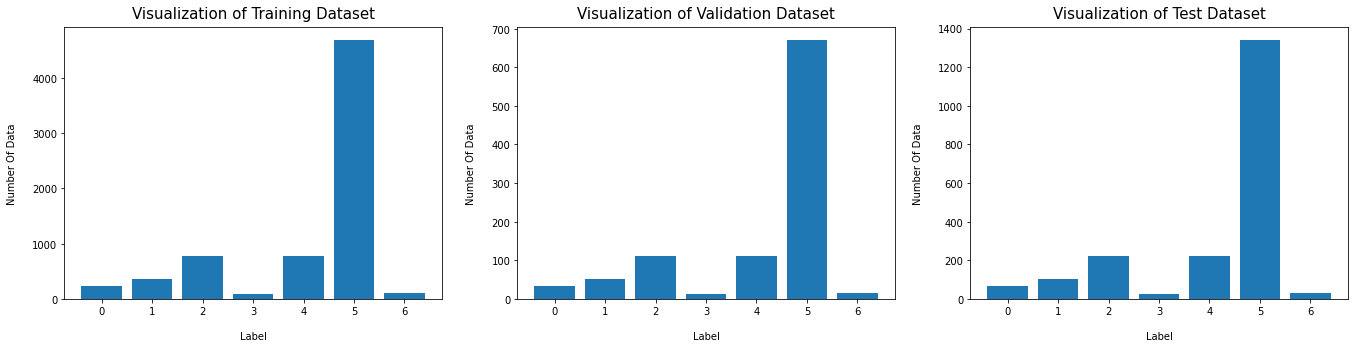

In [4]:
from matplotlib import pyplot as plt

def data_summary(y):
    data = dict()
    for i in range(labels_number):
        data[str(i)] = (int)(np.sum(y==i))
    group_data = list(data.values())
    group_names = list(data.keys())
    return group_data, group_names

def draw_ax(i, group_data, group_names, title):
    ax[i].bar(group_names, group_data)
    ax[i].set_title("Visualization of "+ title , y=1.01, fontsize=15)
    ax[i].set_ylabel("Number Of Data", labelpad=15)
    ax[i].set_xlabel("Label", labelpad=15)

fig, ax = plt.subplots(1, 3, figsize=(23, 5))

group_data, group_names = data_summary(y_train)
draw_ax(0, group_data, group_names, "Training Dataset")

group_data, group_names = data_summary(y_val)
draw_ax(1, group_data, group_names, "Validation Dataset")

group_data, group_names = data_summary(y_test)
draw_ax(2, group_data, group_names, "Test Dataset")

# Preprocess

In [5]:
import tensorflow

x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

y_train = tensorflow.keras.utils.to_categorical(y_train, labels_number)
y_val = tensorflow.keras.utils.to_categorical(y_val, labels_number)
y_test = tensorflow.keras.utils.to_categorical(y_test, labels_number)
print(y_train.shape)
print(x_train.shape)

(7007, 7)
(7007, 28, 28, 3)


# Model && Training

In [37]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Model

visible = Input(shape=(28, 28, 3))
conv1 = Conv2D(32, kernel_size=3, activation='relu')(visible)
pool1 = MaxPooling2D()(conv1)

conv2 = Conv2D(64, kernel_size=3, activation='relu')(pool1)
pool2 = MaxPooling2D()(conv2)
dropout = Dropout(0.2)(pool2)

conv3 = Conv2D(128, kernel_size=3, activation='relu')(dropout)
pool3 = MaxPooling2D()(conv3)
dropout2 = Dropout(0.2)(pool3)

flat = Flatten()(dropout2)
hidden1 = Dense(128, activation='relu')(flat)
output = Dense(7, activation='softmax')(hidden1)
model = Model(inputs=visible, outputs=output)

print(model.summary())

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 5, 5, 64)          0   

In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
219/219 [==============================] - 3s 11ms/step - loss: 1.0484 - accuracy: 0.6666 - val_loss: 0.9595 - val_accuracy: 0.6690
Epoch 2/50
219/219 [==============================] - 2s 8ms/step - loss: 0.9427 - accuracy: 0.6699 - val_loss: 0.9114 - val_accuracy: 0.6810
Epoch 3/50
219/219 [==============================] - 2s 8ms/step - loss: 0.9088 - accuracy: 0.6867 - val_loss: 0.8680 - val_accuracy: 0.6889
Epoch 4/50
219/219 [==============================] - 2s 8ms/step - loss: 0.8875 - accuracy: 0.6889 - val_loss: 0.8761 - val_accuracy: 0.6810
Epoch 5/50
219/219 [==============================] - 2s 8ms/step - loss: 0.8618 - accuracy: 0.6899 - val_loss: 0.8329 - val_accuracy: 0.6989
Epoch 6/50
219/219 [==============================] - 2s 8ms/step - loss: 0.8398 - accuracy: 0.6953 - val_loss: 0.8251 - val_accuracy: 0.6949
Epoch 7/50
219/219 [==============================] - 2s 8ms/step - loss: 0.8172 - accuracy: 0.7010 - val_loss: 0.7884 - val_accuracy: 0.7059
Epoch

In [40]:
def predict_class(x):
  pred = model.predict(x)
  pred_class = np.argmax(pred, axis=1)   
  return np.expand_dims(pred_class, axis=1)

In [41]:
# test model accuracy on test set
prediction = predict_class(x_test)

test_acc = np.sum(prediction == data['test_labels']) / prediction.size
print("test set accuracy", test_acc)

test set accuracy 0.7496259351620947


In [42]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6']

In [43]:
train_pred = predict_class(x_train)
print(classification_report(data['train_labels'], train_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.65      0.65      0.65       228
     class 1       0.71      0.76      0.74       359
     class 2       0.70      0.67      0.69       769
     class 3       0.93      0.16      0.28        80
     class 4       0.74      0.64      0.69       779
     class 5       0.91      0.94      0.93      4693
     class 6       0.85      0.96      0.90        99

    accuracy                           0.85      7007
   macro avg       0.78      0.68      0.69      7007
weighted avg       0.85      0.85      0.85      7007



In [44]:
val_pred = predict_class(x_val)
print(classification_report(data['val_labels'], val_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.44      0.36      0.40        33
     class 1       0.40      0.60      0.48        52
     class 2       0.51      0.44      0.47       110
     class 3       0.00      0.00      0.00        12
     class 4       0.50      0.49      0.50       111
     class 5       0.86      0.88      0.87       671
     class 6       0.69      0.64      0.67        14

    accuracy                           0.74      1003
   macro avg       0.49      0.49      0.48      1003
weighted avg       0.74      0.74      0.74      1003



In [45]:
print(classification_report(data['test_labels'], prediction, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.34      0.36      0.35        66
     class 1       0.45      0.50      0.47       103
     class 2       0.59      0.50      0.54       220
     class 3       0.40      0.17      0.24        23
     class 4       0.49      0.42      0.45       223
     class 5       0.86      0.90      0.88      1341
     class 6       0.63      0.66      0.64        29

    accuracy                           0.75      2005
   macro avg       0.54      0.50      0.51      2005
weighted avg       0.74      0.75      0.74      2005



In [46]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_AUC(x, true_label):
  precision = dict()
  recall = dict()
  for i in range(7):
      precision[i], recall[i], _ = precision_recall_curve(true_label[:, i], model.predict(x)[:, i])
      plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
      
  plt.xlabel("recall")
  plt.ylabel("precision")
  plt.legend(loc="best")
  plt.title("precision vs. recall curve")
  plt.show()

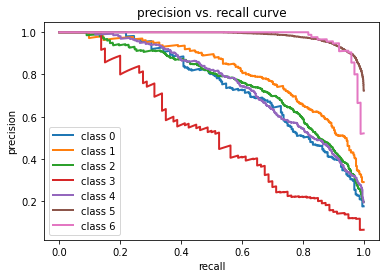

In [47]:
plot_AUC(x_train, y_train)

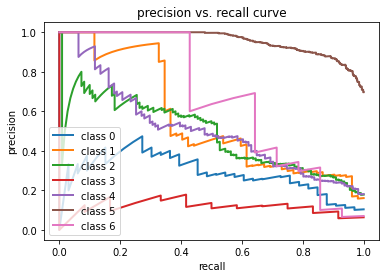

In [48]:
plot_AUC(x_val, y_val)

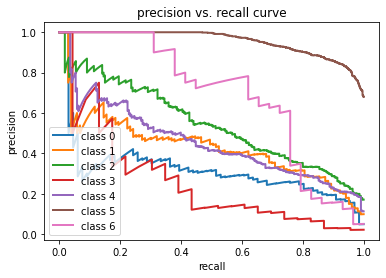

In [49]:
plot_AUC(x_test, y_test)

In [50]:
from sklearn.metrics import confusion_matrix

def plot_confusion(pred, true_label):
  matrix = confusion_matrix(true_label, pred)
  print(matrix)

  plt.imshow(matrix)
  plt.colorbar()

[[ 149   31   24    0    6   18    0]
 [  28  274   16    0    6   33    2]
 [  25   21  519    1   36  162    5]
 [  13   19   14   13    3   18    0]
 [   5   11   64    0  495  202    2]
 [   8   26  108    0  119 4424    8]
 [   0    3    0    0    0    1   95]]


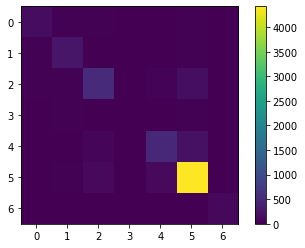

In [51]:
plot_confusion(train_pred, data['train_labels'])  

[[ 12   9   5   1   3   3   0]
 [  5  31   5   0   3   8   0]
 [  2  20  48   0   8  32   0]
 [  2   8   1   0   0   1   0]
 [  3   1   5   0  54  48   0]
 [  2   7  30   0  37 591   4]
 [  1   1   0   0   2   1   9]]


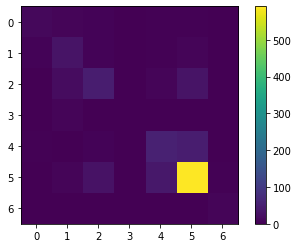

In [52]:
plot_confusion(val_pred, data['val_labels'])  

[[  24   14    9    3    4   12    0]
 [  19   52    8    1    3   17    3]
 [  13   11  109    1   19   67    0]
 [   4    6    1    4    0    8    0]
 [   6    7   21    1   94   92    2]
 [   3   23   37    0   71 1201    6]
 [   1    3    1    0    1    4   19]]


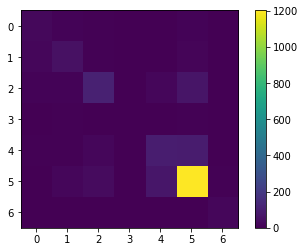

In [53]:
plot_confusion(prediction, data['test_labels'])  